In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# make_blobs 生成大型二进制数据集
# centers 是聚类中心点个数
X, y = make_blobs(n_features=2, n_samples=40, centers=2, random_state=6)

In [18]:
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

SVC(C=1000, kernel='linear')

C:\Users\Gumiano\AppData\Local\Temp/ipykernel_5164/2897888685.py:14: UserWarning: The following kwargs were not used by contour: 'linstyles'
  ax.contour(


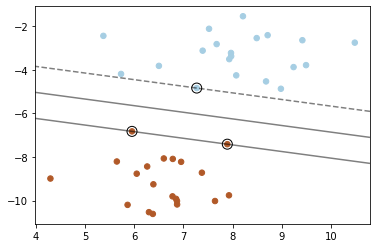

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
XX, YY = np.meshgrid(xx, yy)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# 计算样本点到超平面的函数距离
Z = clf.decision_function(xy).reshape(XX.shape)

# 绘制等高线
# levels=[-1, 0, 1]的意思是在z轴值=-1, 0, 1的地方画等高线
ax.contour(
    XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linstyles=['--', '-', '--']
)

# 绘制支持向量
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors='none',
    edgecolors='k'
)
plt.show()